<a href="https://colab.research.google.com/github/Perniciosius/Star-Type-Classification/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Stars.csv to Stars.csv


## Import required libraries

In [66]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read dataset

In [67]:
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


## Encode categorical features

In [68]:
df = pd.get_dummies(df)
df.head()

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,Color_White-Yellow,Color_Whitish,Color_Yellowish,Color_Yellowish White,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Scale the values of dataset using MinMax Scaler

In [69]:
scaler = MinMaxScaler()
x = df.loc[:, df.columns != 'Type']
x = scaler.fit_transform(x)
y = df.loc[:, 'Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 30)

## Train model and measure accuracy

In [70]:
model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.27      0.43        11
           2       0.95      1.00      0.97        19
           3       1.00      0.80      0.89        10
           4       0.85      0.92      0.88        12
           5       1.00      1.00      1.00        10

    accuracy                           0.85        72
   macro avg       0.89      0.83      0.81        72
weighted avg       0.90      0.85      0.83        72



## Model accuracies for different kernels

In [72]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
  model = SVC(kernel=k)
  model.fit(x_train, y_train)
  print(f"Kernel: {k}\tAccuracy: {model.score(x_test, y_test)}")

Kernel: linear	Accuracy: 0.9027777777777778
Kernel: poly	Accuracy: 0.9722222222222222
Kernel: rbf	Accuracy: 0.8472222222222222
Kernel: sigmoid	Accuracy: 0.75


## Model accuracies for different values of regularization parameter

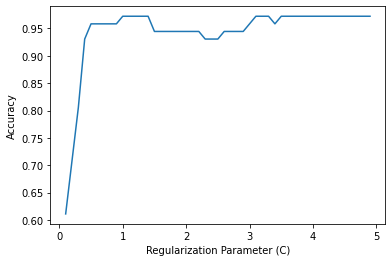

In [73]:
accuracies = []
cs = np.arange(0.1, 5, 0.1)
for c in cs:
  model = SVC(kernel='poly', C = c)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  accuracies.append(accuracy)
plt.plot(cs, accuracies)
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.show()

## Model accuracies for different value of polynomial degree

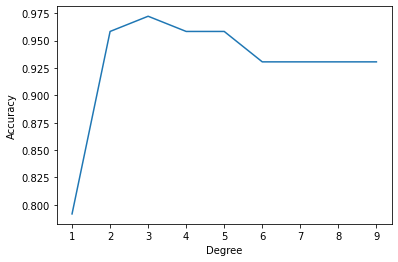

In [77]:
accuracies = []
degrees = np.arange(1, 10)
for deg in degrees:
  model = SVC(kernel='poly', C = 1, degree = deg)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  accuracies.append(accuracy)
plt.plot(degrees, accuracies)
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.show()

## Model accuracies for different values of gamma

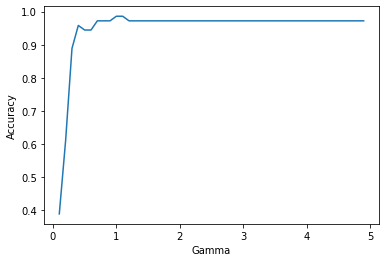

In [75]:
accuracies = []
gammas = np.arange(0.1, 5, 0.1)
for gamma in gammas:
  model = SVC(kernel='poly', C = 1, degree = 3, gamma=gamma)
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)
  accuracies.append(accuracy)
plt.plot(gammas, accuracies)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.show()

## Model with highest accuracy

In [76]:
model = SVC(kernel='poly', C = 1, degree = 3, gamma = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        19
           3       0.91      1.00      0.95        10
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        10

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.98        72
weighted avg       0.99      0.99      0.99        72



# **Inference**
For the given dataset, regularization parameter c = 1, kernel polynomial degree = 3 and gamma = 1 yields the best model with accuracy of 0.99.

It can be seen that poly kernel has the highest accuracy among other kernels. Also for higher values of regularization parameter, the accuracy of model is highest and it does not change further. For degree values in range 2-5 yields the highest accuracy. For gamma = 1, the model accuracy is the highest and as its value increases, the accuracy becomes constant.